In [ ]:
!pip install scikit-plot
!pip install tf-keras-vis tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 862.7 kB/s eta 0:00:00


In [ ]:
# import all libraries
# Train/Test Libraries
import os
import numpy as np
import tensorflow as tf
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import scikitplot
from sklearn.metrics import roc_curve, auc

# Visualization Libraries
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from matplotlib import cm


In [ ]:
# import all libraries
# Train/Test Libraries
import os
import numpy as np
import tensorflow as tf
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import scikitplot
from sklearn.metrics import roc_curve, auc

# Visualization Libraries
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from matplotlib import cm

%cd '/content/drive/My Drive/Colab Notebooks/Drone/'

/content/drive/My Drive/Colab Notebooks/Drone


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from collections import Counter
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import cv2
import scikitplot

from sklearn.metrics import roc_curve, auc

In [ ]:
dataDir = './data'

def Read_Images_and_Make_Numpy_Files():
  images = []
  labels = []
  classes = os.listdir(dataDir)
  print('Classes: {}'.format(classes))
  for class_ in classes:
    if class_ == '0:Type 2_58G_1m':
      print('Reading Data for {} class'.format(class_))
      imageNames = os.listdir(os.path.join(dataDir, class_))
      for imgName in tqdm(imageNames):
        img = load_img(os.path.join(dataDir, class_, imgName), target_size=(224, 224), color_mode='rgb', interpolation='lanczos')
        img_array = img_to_array(img, data_format='channels_last', dtype='float32')
        images.append(img_array)
        labels.append(0)
    elif class_ == '1:Type 3_58G_1m':
      print('Reading Data for {} class'.format(class_))
      imageNames = os.listdir(os.path.join(dataDir, class_))
      for imgName in tqdm(imageNames):
        img = load_img(os.path.join(dataDir, class_, imgName), target_size=(224, 224), color_mode='rgb', interpolation='lanczos')
        img_array = img_to_array(img, data_format='channels_last', dtype='float32')
        images.append(img_array)
        labels.append(1)
    elif class_ == '2:Type 4_58G_1m':
      print('Reading Data for {} class'.format(class_))
      imageNames = os.listdir(os.path.join(dataDir, class_))
      for imgName in tqdm(imageNames):
        img = load_img(os.path.join(dataDir, class_, imgName), target_size=(224, 224), color_mode='rgb', interpolation='lanczos')
        img_array = img_to_array(img, data_format='channels_last', dtype='float32')
        images.append(img_array)
        labels.append(2)
    elif class_ == '3:Type 5_58G_1m':
      print('Reading Data for {} class'.format(class_))
      imageNames = os.listdir(os.path.join(dataDir, class_))
      for imgName in tqdm(imageNames):
        img = load_img(os.path.join(dataDir, class_, imgName), target_size=(224, 224), color_mode='rgb', interpolation='lanczos')
        img_array = img_to_array(img, data_format='channels_last', dtype='float32')
        images.append(img_array)
        labels.append(3)
    elif class_ == '4:Type 6_58G_1m':
      print('Reading Data for {} class'.format(class_))
      imageNames = os.listdir(os.path.join(dataDir, class_))
      for imgName in tqdm(imageNames):
        img = load_img(os.path.join(dataDir, class_, imgName), target_size=(224, 224), color_mode='rgb', interpolation='lanczos')
        img_array = img_to_array(img, data_format='channels_last', dtype='float32')
        images.append(img_array)
        labels.append(4)
    elif class_ == '5:Type 7_58G_1m':
      print('Reading Data for {} class'.format(class_))
      imageNames = os.listdir(os.path.join(dataDir, class_))
      for imgName in tqdm(imageNames):
        img = load_img(os.path.join(dataDir, class_, imgName), target_size=(224, 224), color_mode='rgb', interpolation='lanczos')
        img_array = img_to_array(img, data_format='channels_last', dtype='float32')
        images.append(img_array)
        labels.append(5)


  images = np.array(images).reshape(-1, 224, 224, 3)
  print('Images: {}'.format(images.shape))
  labels = np.array(labels)
  print('Labels: {}'.format(labels.shape))
  np.save('./data output/images', images)
  np.save('./data output/labels', labels)


Read_Images_and_Make_Numpy_Files()

Classes: ['1:Type 3_58G_1m', '0:Type 2_58G_1m', '5:Type 7_58G_1m', '3:Type 5_58G_1m', '2:Type 4_58G_1m', '4:Type 6_58G_1m']
Reading Data for 1:Type 3_58G_1m class


  0%|          | 0/350 [00:00<?, ?it/s]

Reading Data for 0:Type 2_58G_1m class


  0%|          | 0/350 [00:00<?, ?it/s]

Reading Data for 5:Type 7_58G_1m class


  0%|          | 0/350 [00:00<?, ?it/s]

Reading Data for 3:Type 5_58G_1m class


  0%|          | 0/270 [00:00<?, ?it/s]

Reading Data for 2:Type 4_58G_1m class


  0%|          | 0/350 [00:00<?, ?it/s]

Reading Data for 4:Type 6_58G_1m class


  0%|          | 0/350 [00:00<?, ?it/s]

Images: (2020, 224, 224, 3)
Labels: (2020,)


In [ ]:
dataDir = './data output'
x = np.load(dataDir+'/images.npy')
y = np.load(dataDir+'/labels.npy')

print('Images: {} | Labels: {}'.format(x.shape, y.shape))

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=42)
print('Training Images: {} | Test Images: {}'.format(train_x.shape, test_x.shape))
print('Training Labels: {} | Test Labels: {}'.format(train_y.shape, test_y.shape))

# Data Normalization

print('Train: {} , {} | Test: {} , {}'.format(train_x.min(), train_x.max(), test_x.min(), test_x.max()))

train_x/=255
test_x/=255

print('Train: {} , {} | Test: {} , {}'.format(train_x.min(), train_x.max(), test_x.min(), test_x.max()))

Images: (2020, 224, 224, 3) | Labels: (2020,)
Training Images: (1616, 224, 224, 3) | Test Images: (404, 224, 224, 3)
Training Labels: (1616,) | Test Labels: (404,)
Train: 0.0 , 255.0 | Test: 0.0 , 255.0
Train: 0.0 , 1.0 | Test: 0.0 , 1.0


In [ ]:
# Class Mapping
print('0:Type 2_58G_1m | 1:Type 3_58G_1m | 2:Type 4_58G_1m | 3:Type 5_58G_1m | 4:Type 6_58G_1m | 5:Type 7_58G_1m')

# Distribution of images in each class for Training-set
print(Counter(train_y))

# Distribution of images in each class for Test-set
print(Counter(test_y))

#Make Labels Categorical
train_y_oneHot = tf.one_hot(train_y, depth=6)
test_y_oneHot = tf.one_hot(test_y, depth=6)

print('Training Labels: {} | Test Labels: {}'.format(train_y_oneHot.shape, test_y_oneHot.shape))

0:Type 2_58G_1m | 1:Type 3_58G_1m | 2:Type 4_58G_1m | 3:Type 5_58G_1m | 4:Type 6_58G_1m | 5:Type 7_58G_1m
Counter({5: 286, 4: 283, 1: 280, 0: 276, 2: 269, 3: 222})
Counter({2: 81, 0: 74, 1: 70, 4: 67, 5: 64, 3: 48})
Training Labels: (1616, 6) | Test Labels: (404, 6)


In [ ]:
# initialize the training data augmentation object
trainAug = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=15,
                                                            zoom_range=0.2,
                                                           fill_mode="nearest")

def ResNet50V2_Model():
  # load the ResNet50V2 network, ensuring the head FC layer sets are left off
  baseModel = tf.keras.applications.ResNet50V2(weights="imagenet", include_top=False, input_tensor=tf.keras.layers.Input(shape=(224, 224, 3)))
  # construct the head of the model that will be placed on top of the the base model
  output = baseModel.output
  output = tf.keras.layers.AveragePooling2D(pool_size=(4, 4))(output)
  output = tf.keras.layers.Flatten(name="flatten")(output)
#  output = tf.keras.layers.Dense(2048, activation="relu")(output)
#  output = tf.keras.layers.Dropout(0.5)(output)
  output = tf.keras.layers.Dense(1024, activation="relu")(output)
  output = tf.keras.layers.Dropout(0.5)(output)
  output = tf.keras.layers.Dense(512, activation="relu")(output)
  output = tf.keras.layers.Dropout(0.5)(output)
  output = tf.keras.layers.Dense(6, activation="softmax")(output)
  # place the head FC model on top of the base model (this will become the actual model we will train)
  model = tf.keras.Model(inputs=baseModel.input, outputs=output)
  # loop over all layers in the base model and freeze them so they will not be updated during the first training process
  for layer in baseModel.layers:
    layer.trainable = False
  return model

model = ResNet50V2_Model()
# compile our model
print("[INFO] compiling model...")
# initialize the initial learning rate, number of epochs to train for, and batch size

EPOCHS = 25
BATCHSIZE = 32
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9,beta_2=0.999,epsilon=1e-07)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()])
print(model.summary())

[INFO] compiling model...
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                  

In [ ]:
modelPath = '/content/drive/My Drive/Colab Notebooks/Drone/Pretrained ResNet50V2'
if not os.path.exists(modelPath):
  os.makedirs(modelPath)
  print('Model Directory Created')
else:
  print('Model Directory Already Exists')

annealer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.3, patience=5, verbose=1, min_lr=1e-3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(modelPath+'/ResNet50V2-best-model.h5', monitor='val_categorical_accuracy',
                                                      verbose=1, save_best_only=True, mode='auto')

STEP_TRAIN = len(train_x) // BATCHSIZE
STEP_TEST = len(test_x) // BATCHSIZE
modelHistory = model.fit(trainAug.flow(train_x, train_y_oneHot, batch_size=BATCHSIZE), epochs=EPOCHS, verbose=1, callbacks=[model_checkpoint],
                         validation_data=(test_x, test_y_oneHot), shuffle = True, steps_per_epoch=STEP_TRAIN, validation_steps=STEP_TEST)
tf.keras.models.save_model(model, modelPath+'/ResNet50V2-model.h5', overwrite=True, include_optimizer=True, save_format=None,
                           signatures=None, options=None)

Model Directory Already Exists
Epoch 1/25
50/50 [==============================] - ETA: 0s - loss: 1.1986 - categorical_accuracy: 0.5455 - auc_3: 0.8608
Epoch 1: val_categorical_accuracy improved from -inf to 0.61881, saving model to /content/drive/My Drive/Colab Notebooks/Drone/Pretrained ResNet50V2/ResNet50V2-best-model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 47s 803ms/step - loss: 1.1986 - categorical_accuracy: 0.5455 - auc_3: 0.8608 - val_loss: 0.9270 - val_categorical_accuracy: 0.6188 - val_auc_3: 0.9128
Epoch 2/25
50/50 [==============================] - ETA: 0s - loss: 0.8074 - categorical_accuracy: 0.6824 - auc_3: 0.9350
Epoch 2: val_categorical_accuracy improved from 0.61881 to 0.66089, saving model to /content/drive/My Drive/Colab Notebooks/Drone/Pretrained ResNet50V2/ResNet50V2-best-model.h5
50/50 [==============================] - 27s 538ms/step - loss: 0.8074 - categorical_accuracy: 0.6824 - auc_3: 0.9350 - val_loss: 0.8724 - val_categorical_accuracy: 0.6609 - val_auc_3: 0.9253
Epoch 3/25
50/50 [==============================] - ETA: 0s - loss: 0.7041 - categorical_accuracy: 0.7374 - auc_3: 0.9490
Epoch 3: val_categorical_accuracy improved from 0.66089 to 0.66584, saving model to /content/drive/My Drive/Colab Notebooks/Drone/Pretrained ResNet50V2/ResNet50V2-best-model.h5
50/50 [===========

<ipython-input-22-9a6b3c7ae5ea>:16: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, modelPath+'/ResNet50V2-model.h5', overwrite=True, include_optimizer=True, save_format=None,


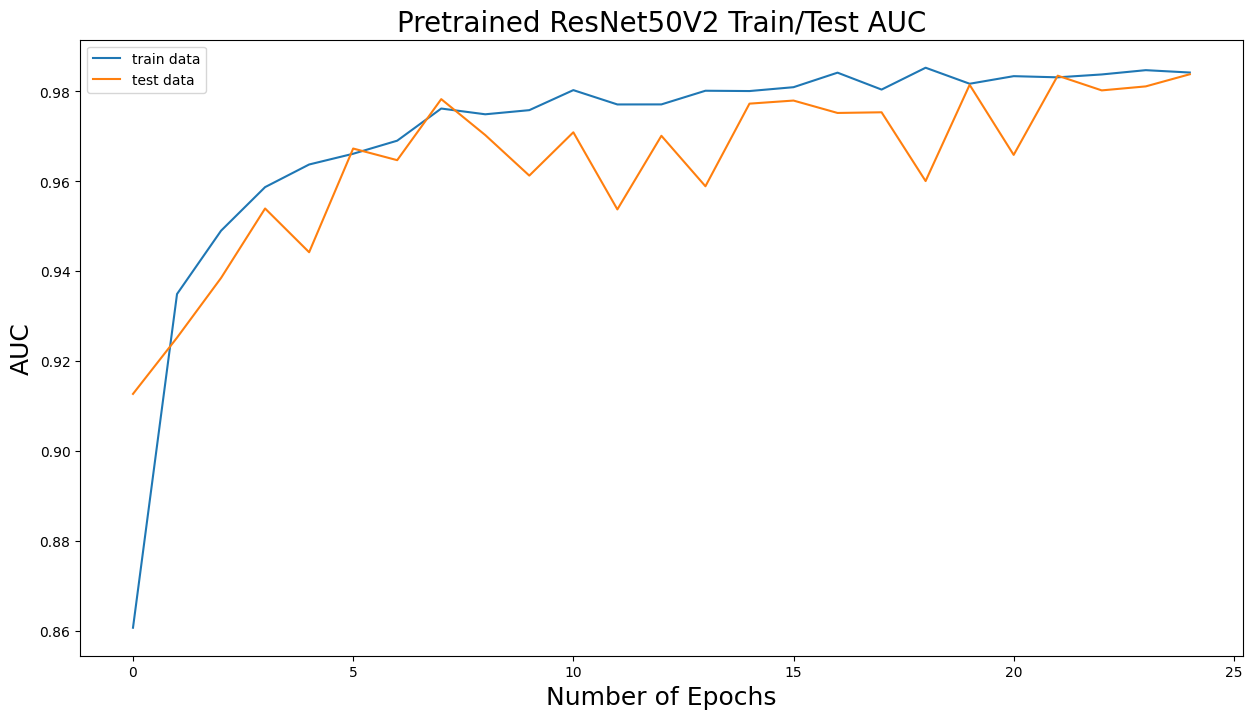

In [ ]:
# Plot history: Loss
plt.figure(figsize=(15, 8))
plt.plot(modelHistory.history['auc_3'], label='train data')
plt.plot(modelHistory.history['val_auc_3'], label='test data')
plt.title('Pretrained ResNet50V2 Train/Test AUC', fontsize=20)
plt.ylabel('AUC', fontsize=18)
plt.xlabel('Number of Epochs', fontsize=18)
plt.legend(loc="upper left")
plt.show()


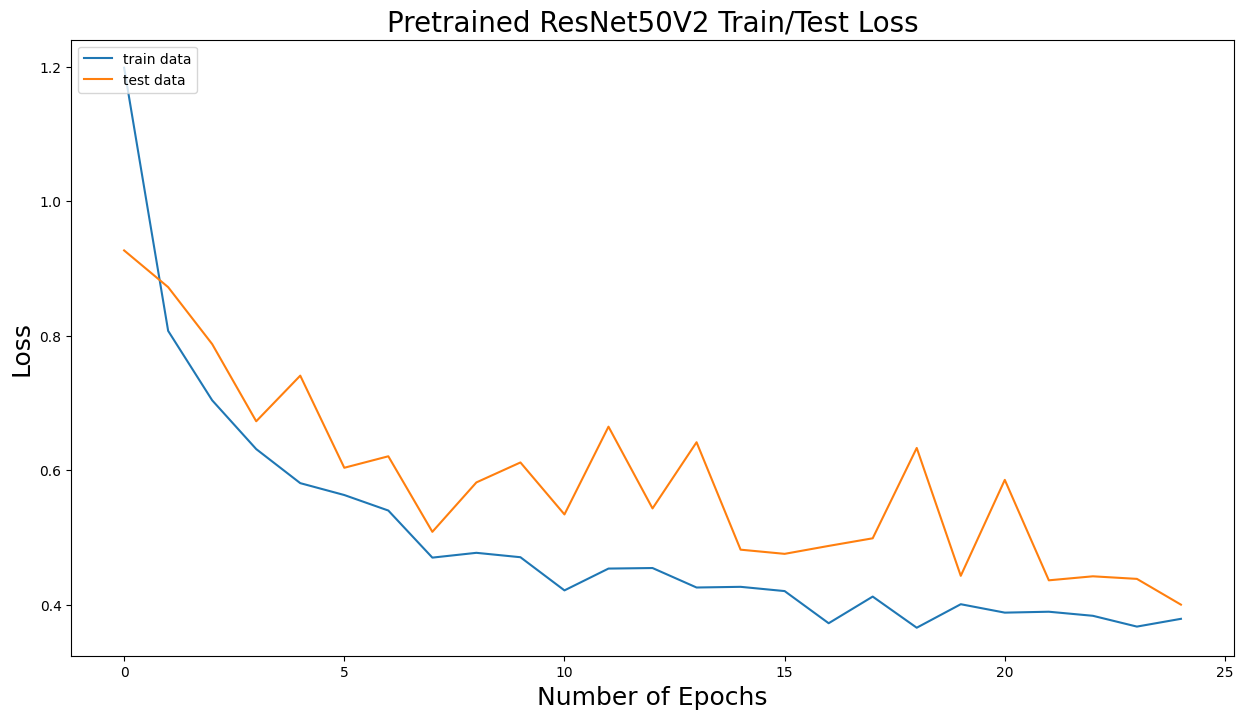

In [ ]:
# Plot history: Loss
plt.figure(figsize=(15, 8))
plt.plot(modelHistory.history['loss'], label='train data')
plt.plot(modelHistory.history['val_loss'], label='test data')
plt.title('Pretrained ResNet50V2 Train/Test Loss', fontsize=20)
plt.ylabel('Loss', fontsize=18)
plt.xlabel('Number of Epochs', fontsize=18)
plt.legend(loc="upper left")
plt.show()

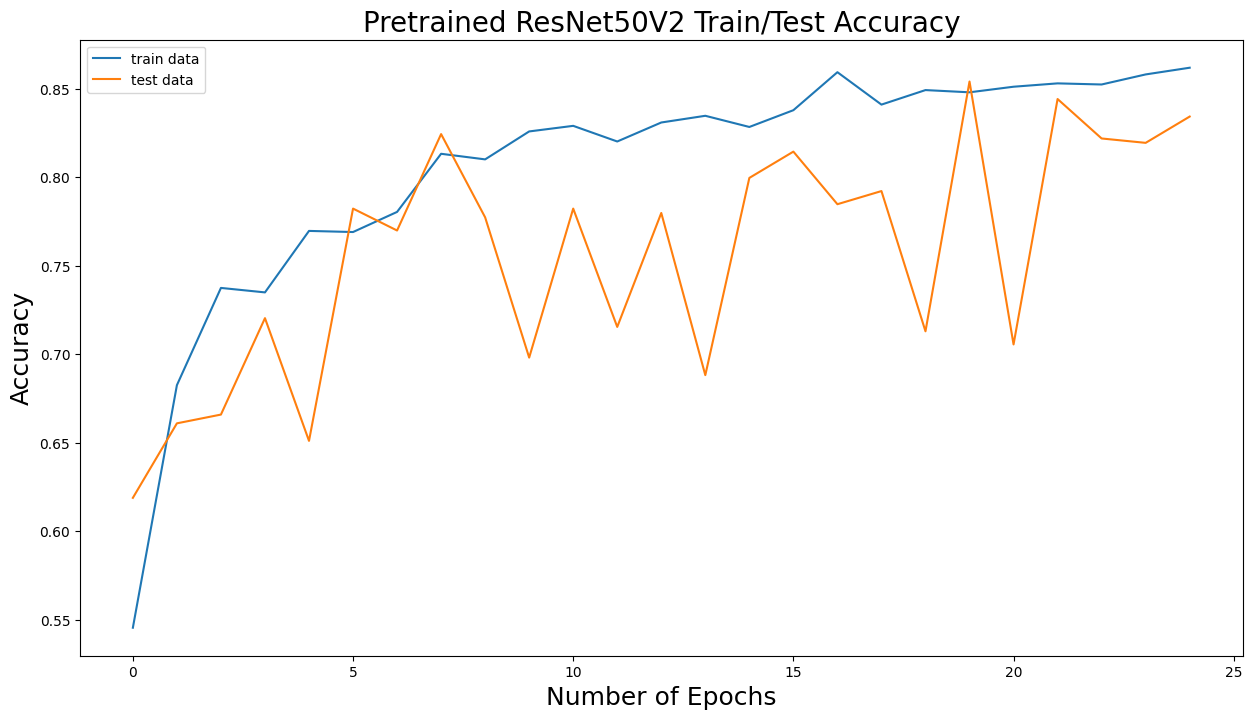

In [ ]:
# Plot history: Loss
plt.figure(figsize=(15, 8))
plt.plot(modelHistory.history['categorical_accuracy'], label='train data')
plt.plot(modelHistory.history['val_categorical_accuracy'], label='test data')
plt.title('Pretrained ResNet50V2 Train/Test Accuracy', fontsize=20)
plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('Number of Epochs', fontsize=18)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Evaluate the Best Saved Model
modelPath = '/content/drive/My Drive/Colab Notebooks/Drone/Pretrained ResNet50V2'
model = tf.keras.models.load_model(modelPath+'/ResNet50V2-best-model.h5')
loss, accuracy, auc = model.evaluate(x=test_x, y=test_y_oneHot, batch_size=32, verbose=1)
print('Model Accuracy: {:0.4f} | Model AUC: {:0.4f} | Model Loss: {:0.4f}'.format(accuracy, auc, loss))

13/13 [==============================] - 3s 169ms/step - loss: 0.4431 - categorical_accuracy: 0.8540 - auc_3: 0.9815
Model Accuracy: 0.8540 | Model AUC: 0.9815 | Model Loss: 0.4431


In [ ]:
from sklearn.metrics import classification_report

classes = ['0:Type 2_58G_1m' , '1:Type 3_58G_1m' , '2:Type 4_58G_1m' , '3:Type 5_58G_1m' , '4:Type 6_58G_1m' , '5:Type 7_58G_1m']
predictions = model.predict(x=test_x, batch_size=32)
predictions = tf.keras.backend.argmax(predictions, axis=-1)
# Generate classification report
classification_rep = classification_report(test_y, predictions, target_names=classes)

# Print and/or use the classification report as needed
print(classification_rep)

13/13 [==============================] - 1s 91ms/step
                 precision    recall  f1-score   support

0:Type 2_58G_1m       0.79      0.96      0.87        74
1:Type 3_58G_1m       0.95      0.90      0.93        70
2:Type 4_58G_1m       0.98      0.64      0.78        81
3:Type 5_58G_1m       0.63      0.98      0.76        48
4:Type 6_58G_1m       0.86      0.72      0.78        67
5:Type 7_58G_1m       1.00      1.00      1.00        64

       accuracy                           0.85       404
      macro avg       0.87      0.87      0.85       404
   weighted avg       0.88      0.85      0.85       404



13/13 [==============================] - 1s 98ms/step


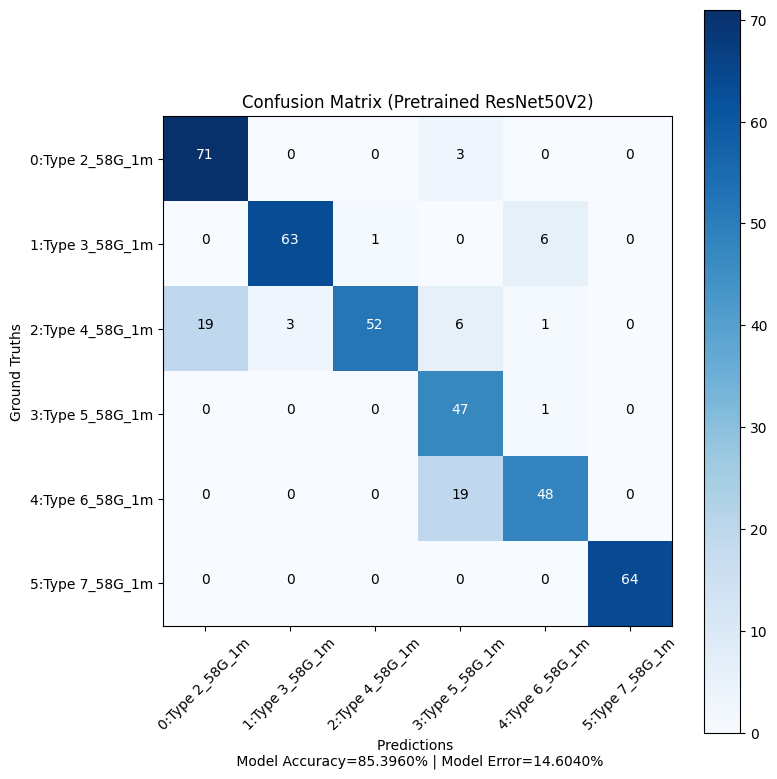

In [ ]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap='Blues', normalize=True):
    """


    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Purples')

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Ground Truths')
    plt.xlabel('Predictions \n Model Accuracy={:0.4f}% | Model Error={:0.4f}%'.format(accuracy*100, misclass*100))
 #   plt.savefig(modelPath+'/denseNet169 (Batch size 32)-cm.png', bbox_inches = "tight")
    plt.show()


predictions = model.predict(x=test_x, batch_size=32)
predictions = tf.keras.backend.argmax(predictions, axis=-1)

cm = confusion_matrix(test_y, predictions)
classes = ['0:Type 2_58G_1m' , '1:Type 3_58G_1m' , '2:Type 4_58G_1m' , '3:Type 5_58G_1m' , '4:Type 6_58G_1m' , '5:Type 7_58G_1m']
plot_confusion_matrix(cm=cm, normalize = False, target_names = classes, title= "Confusion Matrix (Pretrained ResNet50V2)")